## Reading mitab data from psicquic
* [Requests API](https://requests.readthedocs.io/en/master/)

In [2]:
proxies = {
  'http': 'http://ftprox.ibcp.fr:3128',
  'https': 'http://ftprox.ibcp.fr:3128',
}

In [4]:
import requests

psicquicProviderURL="http://www.ebi.ac.uk/Tools/webservices/psicquic/intact/webservices/current/search"
miqlMethod="query"
miqlField="pubid"
miqlValue="17446270"

miqlRequest= f"{psicquicProviderURL}/{miqlMethod}/{miqlField}:{miqlValue}"

print(miqlRequest)

try:
    httpReq = requests.get(miqlRequest, proxies=proxies)
except NameError:
    httpReq = requests.get(miqlRequest)

ans = httpReq.text

http://www.ebi.ac.uk/Tools/webservices/psicquic/intact/webservices/current/search/query/pubid:17446270


In [30]:
psqData = [ _.split("\t") for _ in ans.split("\n") if len(_.split("\t")) > 1]
    
_ = len(psqData[0])
for psqDatum in psqData:
    assert len(psqDatum) == _
print(len(psqData))
psqData[-1]

232


['uniprotkb:P0C722',
 'uniprotkb:Q12933',
 'intact:EBI-2623029|uniprotkb:Q777E3',
 'intact:EBI-355744|uniprotkb:A8K107|uniprotkb:B4DPJ7|uniprotkb:Q7Z337|dip:DIP-6223N|intact:EBI-1046651|uniprotkb:Q96NT2',
 'psi-mi:brrf1_ebvg(display_long)|uniprotkb:BRRF1(orf name)',
 'psi-mi:traf2_human(display_long)|uniprotkb:Tumor necrosis factor type 2 receptor-associated protein 3(gene name synonym)|uniprotkb:E3 ubiquitin-protein ligase TRAF2(gene name synonym)|uniprotkb:RING-type E3 ubiquitin transferase TRAF2(gene name synonym)|uniprotkb:TRAF2(gene name)|psi-mi:TRAF2(display_short)|uniprotkb:TRAP3(gene name synonym)',
 'psi-mi:"MI:0018"(two hybrid)',
 'Calderwood et al. (2007)',
 'pubmed:17446270|imex:IM-20435|mint:MINT-6769080',
 'taxid:10376(ebvg)|taxid:10376("Epstein-Barr virus (strain B95-8)")',
 'taxid:9606(human)|taxid:9606(Homo sapiens)',
 'psi-mi:"MI:0915"(physical association)',
 'psi-mi:"MI:0469"(IntAct)',
 'intact:EBI-2644156|imex:IM-20435-230',
 'intact-miscore:0.37']

### Build EBV self interactome
[NetworkX Draw](https://networkx.github.io/documentation/latest/reference/generated/networkx.drawing.nx_pylab.draw_networkx.html#networkx.drawing.nx_pylab.draw_networkx)

In [33]:
import networkx as nx
import re

G = nx.Graph()
EBV_psqData = []
for psqDatum in psqData:
    if re.search("taxid:(1037[6-7]|82830)", psqDatum[9]) and  re.search("taxid:(1037[6-7]|82830)", psqDatum[10]):
    .append(psqDatum)
        G.add_edge(psqDatum[0].replace("uniprotkb:", ""), psqDatum[1].replace("uniprotkb:", "") )
    else:
        print(psqDatum[9], psqDatum[10])
len(EBV_psqData)

taxid:9606(human)|taxid:9606(Homo sapiens) taxid:10376(ebvg)|taxid:10376("Epstein-Barr virus (strain B95-8)")
taxid:9606(human)|taxid:9606(Homo sapiens) taxid:10376(ebvg)|taxid:10376("Epstein-Barr virus (strain B95-8)")
taxid:9606(human)|taxid:9606(Homo sapiens) taxid:10376(ebvg)|taxid:10376("Epstein-Barr virus (strain B95-8)")
taxid:10376(ebvg)|taxid:10376("Epstein-Barr virus (strain B95-8)") taxid:9606(human)|taxid:9606(Homo sapiens)
taxid:9606(human)|taxid:9606(Homo sapiens) taxid:10376(ebvg)|taxid:10376("Epstein-Barr virus (strain B95-8)")
taxid:10376(ebvg)|taxid:10376("Epstein-Barr virus (strain B95-8)") taxid:9606(human)|taxid:9606(Homo sapiens)
taxid:10376(ebvg)|taxid:10376("Epstein-Barr virus (strain B95-8)") taxid:9606(human)|taxid:9606(Homo sapiens)
taxid:10376(ebvg)|taxid:10376("Epstein-Barr virus (strain B95-8)") taxid:9606(human)|taxid:9606(Homo sapiens)
taxid:10376(ebvg)|taxid:10376("Epstein-Barr virus (strain B95-8)") taxid:9606(human)|taxid:9606(Homo sapiens)
taxid:1037

59

In [28]:
%matplotlib nbagg
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


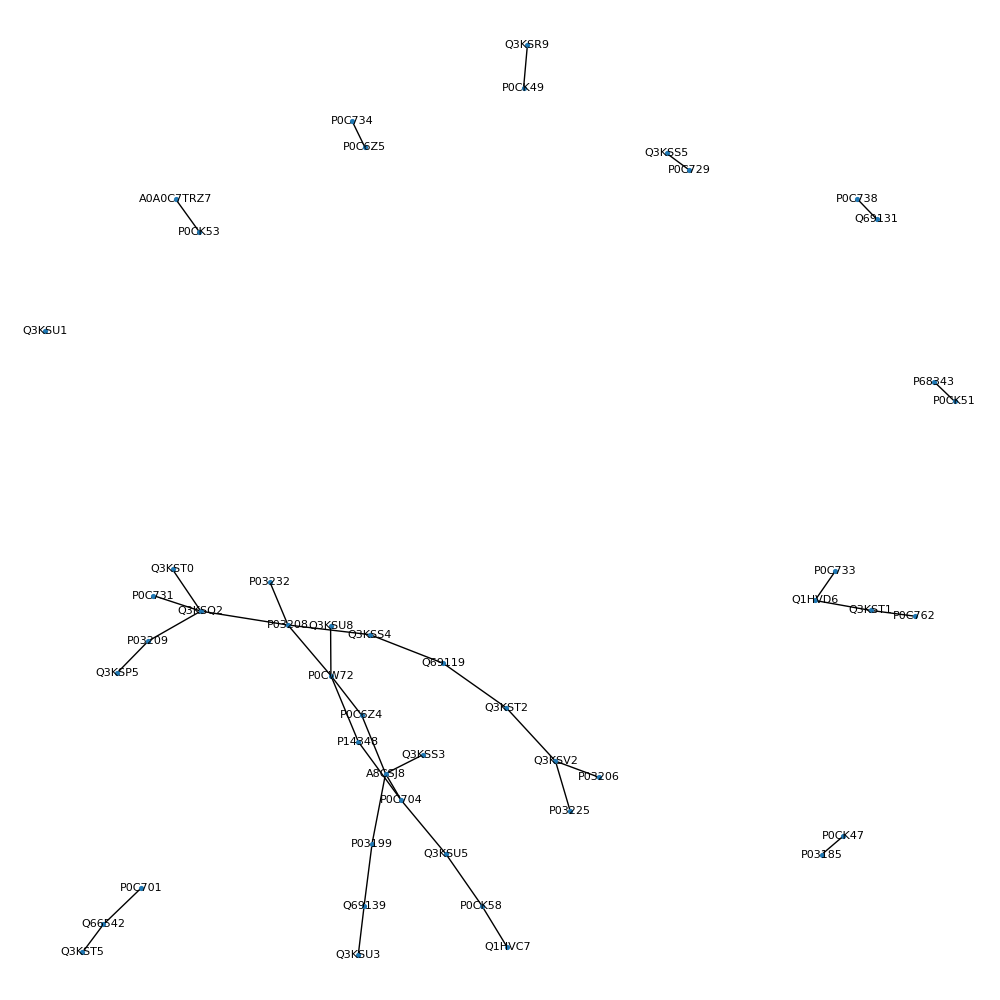

In [55]:
plt.figure(figsize=(10, 10))
nx.draw(G, with_labels=True, node_size=3, font_size=8, linewidths=2)

In [ ]:
### Get EBV xml Entries

In [100]:
from xml.etree.ElementTree import parse, dump, fromstring, register_namespace


#Fetch Xml document from uniprot
target="./data/raw"
EBV_entryName = []
for psqDatum in EBV_psqData:
    EBV_entryName += [ _.replace("uniprotkb:", "") for _ in psqDatum[:2] ]
EBV_entryName = set(EBV_entryName)

xmlRawDoc = []
for uniprotID in EBV_entryName:
    xmlRequest=f"https://www.uniprot.org/uniprot/{uniprotID}.xml"
    try:
        httpReq = requests.get(xmlRequest, proxies=proxies)
    except NameError:
        httpReq = requests.get(xmlRequest)

    xmlRawDoc.append(httpReq.text)


In [98]:
register_namespace('', "http://uniprot.org/uniprot")
ns = '{http://uniprot.org/uniprot}'
collectionHolder = '<?xml version="1.0" encoding="UTF-8"?>\n<uniprot xmlns="http://uniprot.org/uniprot" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" xsi:schemaLocation="http://uniprot.org/uniprot http://www.uniprot.org/support/docs/uniprot.xsd"></uniprot>'
collection = fromstring(collectionHolder)
dump(collection)
for _ in xmlRawDoc:
    tree = fromstring(_)
    collection.append(tree.find(ns+"entry"))

print( len(xmlRawDoc), len( collection.findall(ns+"entry") ) )


<uniprot xmlns="http://uniprot.org/uniprot" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" xsi:schemaLocation="http://uniprot.org/uniprot http://www.uniprot.org/support/docs/uniprot.xsd" />
48 48


In [102]:
from xml.etree.ElementTree import ElementTree
tree = ElementTree(collection)
tree.write("toto.xml")

In [89]:
dump(collection)

<uniprot xmlns="http://uniprot.org/uniprot" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" xsi:schemaLocation="http://uniprot.org/uniprot http://www.uniprot.org/support/docs/uniprot.xsd"><uniprot xsi:schemaLocation="http://uniprot.org/uniprot http://www.uniprot.org/support/docs/uniprot.xsd">
<entry dataset="Swiss-Prot" created="1986-07-21" modified="2020-08-12" version="68">
<accession>P03232</accession>
<accession>Q777B8</accession>
<name>UL24_EBVB9</name>
<protein>
<recommendedName>
<fullName>Protein UL24 homolog</fullName>
</recommendedName>
</protein>
<gene>
<name type="ORF">BXRF1</name>
</gene>
<organism>
<name type="scientific">Epstein-Barr virus (strain B95-8)</name>
<name type="common">HHV-4</name>
<name type="synonym">Human herpesvirus 4</name>
<dbReference type="NCBI Taxonomy" id="10377" />
<lineage>
<taxon>Viruses</taxon>
<taxon>Duplodnaviria</taxon>
<taxon>Heunggongvirae</taxon>
<taxon>Peploviricota</taxon>
<taxon>Herviviricetes</taxon>
<taxon>Herpesvirales</taxon>
<

<end position="206" />
</location>
</feature>
<feature type="disulfide bond" evidence="3">
<location>
<begin position="295" />
<end position="342" />
</location>
</feature>
<feature type="disulfide bond" evidence="3">
<location>
<begin position="551" />
<end position="588" />
</location>
</feature>
<evidence key="1" type="ECO:0000250" />
<evidence key="2" type="ECO:0000255" />
<evidence key="3" type="ECO:0000255">
<source>
<dbReference type="HAMAP-Rule" id="MF_04032" />
</source>
</evidence>
<sequence length="857" mass="95609" checksum="928490D0B9EB8488" modified="2009-09-22" version="1" precursor="true">MTRRRVLSVVVLLAALACRLGAQTPEQPAPPATTVQPTATRQQTSFPFRVCELSSHGDLFRFSSDIQCPSFGTRENHTEGLLMVFKDNIIPYSFKVRSYTKIVTNILIYNGWYADSVTNRHEEKFSVDSYETDQMDTIYQCYNAVKMTKDGLTRVYVDRDGVNITVNLKPTGGLANGVRRYASQTELYDAPGWLIWTYRTRTTVNCLITDMMAKSNSPFDFFVTTTGQTVEMSPFYDGKNKETFHERADSFHVRTNYKIVDYDNRGTNPQGERRAFLDKGTYTLSWKLENRTAYCPLQHWQTFDSTIATETGKSIHFVTDEGTSSFVTNTTVGIELPDAFKCIEEQVNKTMHEKYEAVQDRYTKGQEAITYFITSGGLLLAWLPLTPR

<dbReference type="EMBL" id="V01555">
<property type="protein sequence ID" value="CAA24826.1" />
<property type="molecule type" value="Genomic_DNA" />
</dbReference>
<dbReference type="EMBL" id="AJ507799">
<property type="protein sequence ID" value="CAD53436.1" />
<property type="molecule type" value="Genomic_DNA" />
</dbReference>
<dbReference type="PIR" id="H43043">
<property type="entry name" value="QQBE36" />
</dbReference>
<dbReference type="RefSeq" id="YP_401686.1">
<property type="nucleotide sequence ID" value="NC_007605.1" />
</dbReference>
<dbReference type="IntAct" id="P0CK51">
<property type="interactions" value="1" />
</dbReference>
<dbReference type="GeneID" id="3783765" />
<dbReference type="KEGG" id="vg:3783765" />
<dbReference type="Proteomes" id="UP000153037">
<property type="component" value="Genome" />
</dbReference>
<dbReference type="GO" id="GO:0044178">
<property type="term" value="C:host cell Golgi membrane" />
<property type="evidence" value="ECO:0000501" />
<pr

<experiments>3</experiments>
</comment>
<comment type="subcellular location">
<subcellularLocation>
<location evidence="1 2 4">Host nucleus inner membrane</location>
<topology evidence="1 2 4">Single-pass membrane protein</topology>
</subcellularLocation>
<text evidence="1">Localizes also at the transient membrane of perinuclear virions.</text>
</comment>
<comment type="PTM">
<text evidence="1">Phosphorylated.</text>
</comment>
<comment type="similarity">
<text evidence="1">Belongs to the herpesviridae NEC2 protein family.</text>
</comment>
<dbReference type="EMBL" id="V01555">
<property type="protein sequence ID" value="CAA24879.1" />
<property type="molecule type" value="Genomic_DNA" />
</dbReference>
<dbReference type="EMBL" id="M11923">
<property type="protein sequence ID" value="AAA45869.1" />
<property type="molecule type" value="Genomic_DNA" />
</dbReference>
<dbReference type="EMBL" id="AJ507799">
<property type="protein sequence ID" value="CAD53399.1" />
<property type="molecu

<name type="common">HHV-4</name>
<name type="synonym">Human herpesvirus 4</name>
<dbReference type="NCBI Taxonomy" id="10376" />
<lineage>
<taxon>Viruses</taxon>
<taxon>Duplodnaviria</taxon>
<taxon>Heunggongvirae</taxon>
<taxon>Peploviricota</taxon>
<taxon>Herviviricetes</taxon>
<taxon>Herpesvirales</taxon>
<taxon>Herpesviridae</taxon>
<taxon>Gammaherpesvirinae</taxon>
<taxon>Lymphocryptovirus</taxon>
</lineage>
</organism>
<organismHost>
<name type="scientific">Homo sapiens</name>
<name type="common">Human</name>
<dbReference type="NCBI Taxonomy" id="9606" />
</organismHost>
<reference key="1">
<citation type="journal article" date="2005" name="J. Virol." volume="79" first="15323" last="15330">
<title>Genomic sequence analysis of Epstein-Barr virus strain GD1 from a nasopharyngeal carcinoma patient.</title>
<authorList>
<person name="Zeng M.-S." />
<person name="Li D.-J." />
<person name="Liu Q.-L." />
<person name="Song L.-B." />
<person name="Li M.-Z." />
<person name="Zhang R.-H." 

<begin position="196" />
<end position="228" />
</location>
</feature>
<feature type="strand" evidence="1">
<location>
<begin position="57" />
<end position="59" />
</location>
</feature>
<feature type="helix" evidence="2">
<location>
<begin position="175" />
<end position="221" />
</location>
</feature>
<feature type="helix" evidence="2">
<location>
<begin position="227" />
<end position="230" />
</location>
</feature>
<evidence key="1" type="ECO:0000244">
<source>
<dbReference type="PDB" id="2AK4" />
</source>
</evidence>
<evidence key="2" type="ECO:0000244">
<source>
<dbReference type="PDB" id="2C9L" />
</source>
</evidence>
<evidence key="3" type="ECO:0000250" />
<evidence key="4" type="ECO:0000269">
<source>
<dbReference type="PubMed" id="10725330" />
</source>
</evidence>
<evidence key="5" type="ECO:0000269">
<source>
<dbReference type="PubMed" id="10849009" />
</source>
</evidence>
<evidence key="6" type="ECO:0000269">
<source>
<dbReference type="PubMed" id="17079287" />
</sourc

<name type="synonym">Human herpesvirus 4</name>
<dbReference type="NCBI Taxonomy" id="10376" />
<lineage>
<taxon>Viruses</taxon>
<taxon>Duplodnaviria</taxon>
<taxon>Heunggongvirae</taxon>
<taxon>Peploviricota</taxon>
<taxon>Herviviricetes</taxon>
<taxon>Herpesvirales</taxon>
<taxon>Herpesviridae</taxon>
<taxon>Gammaherpesvirinae</taxon>
<taxon>Lymphocryptovirus</taxon>
</lineage>
</organism>
<organismHost>
<name type="scientific">Homo sapiens</name>
<name type="common">Human</name>
<dbReference type="NCBI Taxonomy" id="9606" />
</organismHost>
<reference key="1">
<citation type="journal article" date="2005" name="J. Virol." volume="79" first="15323" last="15330">
<title>Genomic sequence analysis of Epstein-Barr virus strain GD1 from a nasopharyngeal carcinoma patient.</title>
<authorList>
<person name="Zeng M.-S." />
<person name="Li D.-J." />
<person name="Liu Q.-L." />
<person name="Song L.-B." />
<person name="Li M.-Z." />
<person name="Zhang R.-H." />
<person name="Yu X.-J." />
<pe

<end position="61" />
</location>
</feature>
<feature type="transmembrane region" description="Helical" evidence="1">
<location>
<begin position="68" />
<end position="88" />
</location>
</feature>
<feature type="transmembrane region" description="Helical" evidence="1">
<location>
<begin position="96" />
<end position="116" />
</location>
</feature>
<feature type="transmembrane region" description="Helical" evidence="1">
<location>
<begin position="139" />
<end position="159" />
</location>
</feature>
<feature type="transmembrane region" description="Helical" evidence="1">
<location>
<begin position="193" />
<end position="213" />
</location>
</feature>
<feature type="transmembrane region" description="Helical" evidence="1">
<location>
<begin position="229" />
<end position="249" />
</location>
</feature>
<feature type="transmembrane region" description="Helical" evidence="1">
<location>
<begin position="270" />
<end position="290" />
</location>
</feature>
<feature type="compositional

<id>P0C703</id>
<label>MCP</label>
</interactant>
<organismsDiffer>true</organismsDiffer>
<experiments>2</experiments>
</comment>
<comment type="subcellular location">
<subcellularLocation>
<location evidence="1">Virion</location>
</subcellularLocation>
<subcellularLocation>
<location evidence="1">Host nucleus</location>
</subcellularLocation>
</comment>
<comment type="similarity">
<text evidence="1">Belongs to the herpesviridae small capsomere-interacting protein family.</text>
</comment>
<comment type="sequence caution" evidence="2">
<conflict type="erroneous initiation">
<sequence resource="EMBL-CDS" id="CAA24838" version="1" />
</conflict>
</comment>
<dbReference type="EMBL" id="V01555">
<property type="protein sequence ID" value="CAA24838.1" />
<property type="status" value="ALT_INIT" />
<property type="molecule type" value="Genomic_DNA" />
</dbReference>
<dbReference type="EMBL" id="M11923">
<property type="protein sequence ID" value="AAA45870.1" />
<property type="molecule type"

<authorList>
<person name="Zeng M.-S." />
<person name="Li D.-J." />
<person name="Liu Q.-L." />
<person name="Song L.-B." />
<person name="Li M.-Z." />
<person name="Zhang R.-H." />
<person name="Yu X.-J." />
<person name="Wang H.-M." />
<person name="Ernberg I." />
<person name="Zeng Y.-X." />
</authorList>
<dbReference type="PubMed" id="16306603" />
<dbReference type="DOI" id="10.1128/jvi.79.24.15323-15330.2005" />
</citation>
<scope>NUCLEOTIDE SEQUENCE [LARGE SCALE GENOMIC DNA]</scope>
</reference>
<reference key="2">
<citation type="journal article" date="2009" name="Trends Biochem. Sci." volume="34" first="25" last="32">
<title>Tinkering with a viral ribonucleotide reductase.</title>
<authorList>
<person name="Lembo D." />
<person name="Brune W." />
</authorList>
<dbReference type="PubMed" id="18990579" />
<dbReference type="DOI" id="10.1016/j.tibs.2008.09.008" />
</citation>
<scope>REVIEW</scope>
</reference>
<comment type="function">
<text evidence="1">Ribonucleoside-diphosphat

<dbReference type="Proteomes" id="UP000007641">
<property type="component" value="Genome" />
</dbReference>
<dbReference type="InterPro" id="IPR006772">
<property type="entry name" value="Herpes_BTRF1" />
</dbReference>
<dbReference type="Pfam" id="PF04682">
<property type="entry name" value="Herpes_BTRF1" />
<property type="match status" value="1" />
</dbReference>
<proteinExistence type="evidence at protein level" />
<feature type="chain" description="Uncharacterized protein BTRF1" id="PRO_0000382446">
<location>
<begin position="1" />
<end position="404" />
</location>
</feature>
<evidence key="1" type="ECO:0000305" />
<sequence length="404" mass="44344" checksum="9F5140CFF7318B85" modified="2009-09-01" version="1">MLKCKQPGARFIHGAVHLPSGQIVFHTIHSPTLASALGLPGENVPIPALFRASGLNVRESLPMTNMRAPIISLARLILAPNPYILEGQLTVGMTQDNGIPVLFARPVIEVKSGPESNIKASSQLMIAEDSCLNQIAPFSASEHPAFSMVESVKRVRVDEGANTRRTIRDILEIPVTVLSSLQLSPTKSILKKAPEPPPPEPQATFDATPYARIFYDIGRQVPKLGNAPAAQVSNVLIANRSHNSLRLVPNPDLLPLQHLYLKHVVLKSLNLE

In [ ]:
#Merge them into a single xml file



In [62]:
from xml.etree.ElementTree import parse, dump
# Parse the E.Coli proteome XML Document
tree = parse('./data/uniprot-proteome_UP000272970.xml')
root = tree.getroot()
ns = '{http://uniprot.org/uniprot}' # add more as needed
# Store all entries aka proteins in a list of xml nodes
proteins = root.findall(ns + 'entry')
# Display the xml subtree of the first protein 
#dump(proteins[0])
# Find the xml subtree of a protein with accession "P31224"

EBV_entryName = []
for psqDatum in EBV_psqData:
    EBV_entryName += [ _.replace("uniprotkb:", "") for _ in psqDatum[:2] ]
EBV_entryName = set(EBV_entryName)

for entry in proteins:
    accessions = entry.findall(ns+"accession")
    for acc in accessions:
        print(acc.text)
        if acc.text in EBV_entryName:
            dump(entry)
            break

Q3KSQ1
Q1HVD0
A0A0C7T1T1
A0A0C7TGE3
A0A0C7TNS5
A0A0C7T263
A0A0C7TLK8
A0A0C7T1N7
A0A0C7TGY8
A0A0C7TLN2
K9UTL9
A0A0C7THV4
A0A0C7T1N3
A0A0A8IL23
A0A0C7TNI8
A0A0C7TNG4
V5KU68
Q3KSU9
Q1HVI0
A0A0C7T714
G3CKR6
A0A0C7THY7
I1YP44
A0A0C7TS68
A0A0C7T237
A0A0C7SZ13
A0A0B6VN71
A0A0C7TLP2
A0A0C7T1T5
A0A0C7TGH1
A0A0C7T243
G3CKS3
I1YP38
Q1HVE5
A0A0C7THW3
K9US56
V5KU72
A0A0C7TGD9
A0A0C7TLJ0
A0A0C7T6W6
G3CKP9
K9UTN7
A0A0C7TS97
G3CKS7
Q1HVC8
Q9Q2P1
Q777A9
K9USF9
K9UTR5
A0A0C7THV1
A0A0C7T229
A0A0C7T721
A0A0C7SWW3
I1YP36
A0A0A8IKZ1
A0A0C7THY4
K9UT94
Q1HVB7
A0A0C7TNE4
A0A0C7SWP2
G3CKQ5
A0A0C7T6Y4
Q3KSR4
Q1HVE4
A0A0C7TLJ4
A0A0C7SWT0
A0A0C7TSA8
G3CKS2
A0A0C7TLI0
G3CKR2
A0A0C7T282
A0A0C7SWT3
A0A0C7TGI1
A0A0C7T6V2
Q3KSU6
A0A0C7T2A6
K9USW1
I1YP11
V5KUD1
A0A0C7TNH9
K9UR87
V5KUC1
G3CKR8
G3CKS0
K9UTT7
A0A0C7T1L6
A0A0C7TGE0
G3CKQ4
I1YP13
A0A0C7T6W2
A0A0C7TLG9


In [61]:
EBV_entryName

{'A0A0C7TRZ7',
 'A8CSJ8',
 'P03185',
 'P03199',
 'P03206',
 'P03208',
 'P03209',
 'P03225',
 'P03232',
 'P0C6Z4',
 'P0C6Z5',
 'P0C701',
 'P0C704',
 'P0C729',
 'P0C731',
 'P0C733',
 'P0C734',
 'P0C738',
 'P0C762',
 'P0CK47',
 'P0CK49',
 'P0CK51',
 'P0CK53',
 'P0CK58',
 'P0CW72',
 'P14348',
 'P68343',
 'Q1HVC7',
 'Q1HVD6',
 'Q3KSP5',
 'Q3KSQ2',
 'Q3KSR9',
 'Q3KSS3',
 'Q3KSS4',
 'Q3KSS5',
 'Q3KST0',
 'Q3KST1',
 'Q3KST2',
 'Q3KST5',
 'Q3KSU1',
 'Q3KSU3',
 'Q3KSU5',
 'Q3KSU8',
 'Q3KSV2',
 'Q66542',
 'Q69119',
 'Q69131',
 'Q69139'}

In [59]:
proteins

[<Element '{http://uniprot.org/uniprot}entry' at 0x129999590>,
 <Element '{http://uniprot.org/uniprot}entry' at 0x128a53360>,
 <Element '{http://uniprot.org/uniprot}entry' at 0x128a63720>,
 <Element '{http://uniprot.org/uniprot}entry' at 0x128a6c860>,
 <Element '{http://uniprot.org/uniprot}entry' at 0x1285c4ae0>,
 <Element '{http://uniprot.org/uniprot}entry' at 0x1285cfb80>,
 <Element '{http://uniprot.org/uniprot}entry' at 0x127f548b0>,
 <Element '{http://uniprot.org/uniprot}entry' at 0x128a96860>,
 <Element '{http://uniprot.org/uniprot}entry' at 0x1291b35e0>,
 <Element '{http://uniprot.org/uniprot}entry' at 0x1282edb80>,
 <Element '{http://uniprot.org/uniprot}entry' at 0x1267c9860>,
 <Element '{http://uniprot.org/uniprot}entry' at 0x127307f40>,
 <Element '{http://uniprot.org/uniprot}entry' at 0x1285b4310>,
 <Element '{http://uniprot.org/uniprot}entry' at 0x127329540>,
 <Element '{http://uniprot.org/uniprot}entry' at 0x1282d3a90>,
 <Element '{http://uniprot.org/uniprot}entry' at 0x1273